# Analyzing Model Performance in Online Sales from India: A Case Study on Amazon's 2022 Sales Report



The data used in this study is the same as that from the previous capstone, with the addition of a newly created variable called "Sales," derived from "Qty" and "Amount." Since the steps performed in the previous capstone are not the focus here, this section aims to preprocess and conduct exploratory analysis specifically for the time series analyinclude!

In [ ]:
#load the data
Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO  
from IPython.display import Image  
import pydotplus
import pydot
from sklearn.tree import plot_tree, export_text
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn import utils
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from joblib import *
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import datetime
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
fig = plt.figure(figsize=(12,10))

In [360]:
# Upload the data
data12 = pd.read_csv('AmazonSales2.csv',low_memory=False)

In [361]:
data12.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by,Sales
0,4,4/30/2022,Shipped,Merchant,Amazon,1,Top,3XL,1,INR,574.0,CHENNAI,600073.0,IN,NaN,574
1,8,4/30/2022,Cancelled,Merchant,Amazon,1,Set,3XL,0,NaN,NaN,HYDERABAD,500008.0,IN,NaN,0
2,20,4/30/2022,Shipped,Amazon,Amazon,1,kurta,3XL,1,INR,517.0,TIRUCHIRAPPALLI,620018.0,IN,NaN,517
3,41,4/30/2022,Shipped,Merchant,Amazon,1,Western Dress,3XL,1,INR,885.0,JABALPUR,482002.0,IN,NaN,885
4,69,4/30/2022,Shipped,Amazon,Amazon,1,Set,3XL,1,INR,1146.0,VIJAPURA,586201.0,IN,NaN,1146


In [362]:
data12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             128975 non-null  int64  
 1   Date              128975 non-null  object 
 2   Status            128975 non-null  object 
 3   FulfilmentB       128975 non-null  object 
 4   Fulfilment        128975 non-null  object 
 5   Fulfilment_dum    128975 non-null  int64  
 6   Category          128975 non-null  object 
 7   Size              128975 non-null  object 
 8   Qty               128975 non-null  int64  
 9   currency          121180 non-null  object 
 10  Amount            121180 non-null  float64
 11  ship-city         128942 non-null  object 
 12  ship-postal-code  128942 non-null  float64
 13  ship-country      128942 non-null  object 
 14  fulfilled-by      39277 non-null   object 
 15  Sales             128975 non-null  int64  
dtypes: float64(2), int64

In [53]:
data12.isnull().sum()

index                   0
Date                    0
Status                  0
FulfilmentB             0
Fulfilment              0
Fulfilment_dum          0
Category                0
Size                    0
Qty                     0
currency             7795
Amount               7795
ship-city              33
ship-postal-code       33
ship-country           33
fulfilled-by        89698
Sales                   0
dtype: int64

In [363]:
data12 = data12.dropna()
data12.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by,Sales
89698,1,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,406.0,BENGALURU,560085.0,IN,Easy Ship,406
89699,26,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,299.0,BILASPUR,495001.0,IN,Easy Ship,299
89701,85,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,Bottom,3XL,1,INR,377.0,KOLKATA,700078.0,IN,Easy Ship,377
89702,92,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,725.0,CHENNAI,600028.0,IN,Easy Ship,725
89703,129,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,579.0,BENGALURU,560055.0,IN,Easy Ship,579


In [8]:
data12.shape

(37528, 16)

# Exploratory Analysis with variables FulfimentB not being transformed

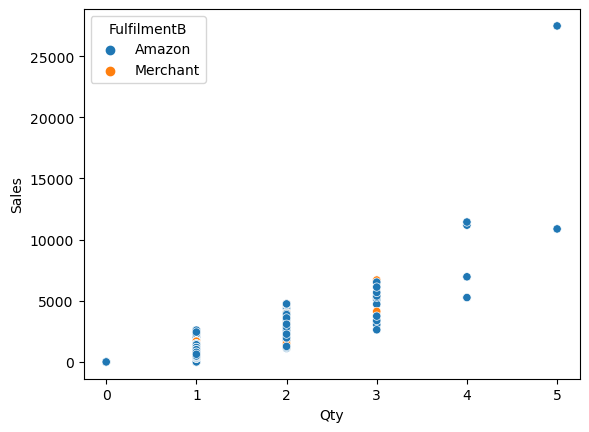

In [55]:
# Make a scatterplot with Qty as x, Sales as Y with regards to FulfilmentB ( not being transformed to 0 and 1)
_ = sns.scatterplot(x='Qty', y='Sales', data=data12, hue='FulfilmentB')

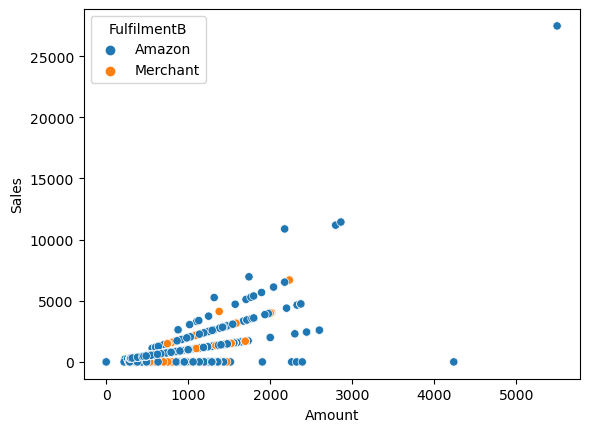

In [56]:
# Make a scatterplot with Qty as x, Sales as Y with regards to FulfilmentB ( Not being transformed to 0 and 1)
_ = sns.scatterplot(x='Amount', y='Sales', data=data12, hue='FulfilmentB')

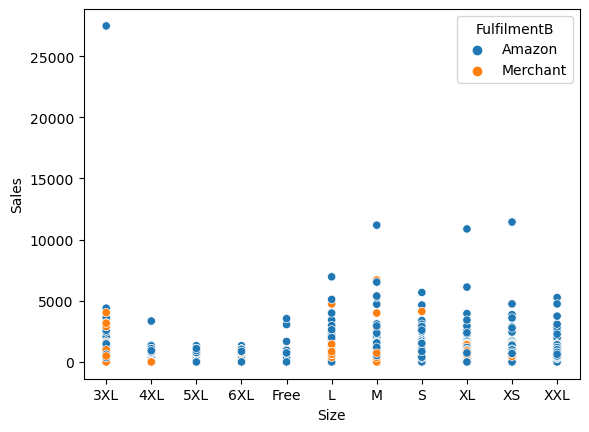

In [57]:
# Make a scatterplot with Qty as x, Amount as Y with regards to FulfilmentB 
_ = sns.scatterplot(x='Size', y='Sales', data=data12, hue='FulfilmentB')

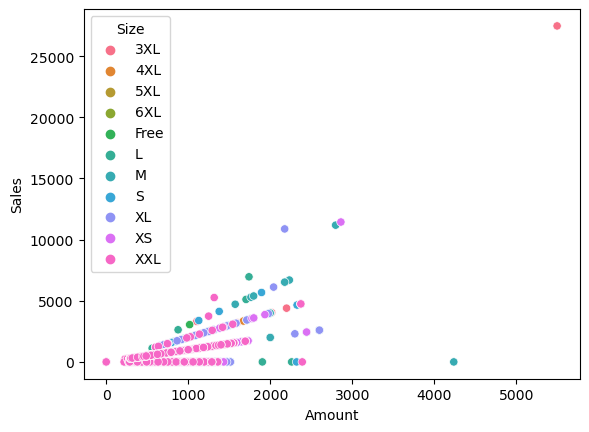

In [58]:
# Make a scatterplot with Qty as x, Sales as Y with regards to FulfilmentB 
_ = sns.scatterplot(x='Amount', y='Sales', data=data12, hue='Size')

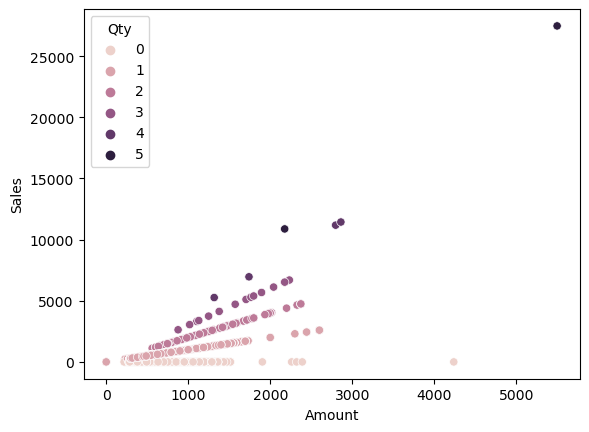

In [59]:
# Make a scatterplot with Qty as x, Amount as Y with regards to FulfilmentB 
_ = sns.scatterplot(x='Amount', y='Sales', data=data12, hue='Qty')

In [364]:
#Descriptive statistics for the numerical variables
#df = pd.DataFrame([[1,2,3,4]], columns=['a', 'b', 'v', 'w'])
dd2=pd.DataFrame(data12,columns=['index','Qty','Amount','ship-postal-code', 'Sales']).describe()
dd2

,index,Qty,Amount,ship-postal-code,Sales
count,37528.000000,37528.000000,37528.000000,37528.000000,37528.000000
mean,60932.856401,0.867406,646.523191,463355.001359,567.938446
std,36853.971158,0.354206,279.995058,194518.859123,409.562168
min,0.000000,0.000000,0.000000,110001.000000,0.000000
25%,27192.750000,1.000000,458.000000,380001.000000,368.000000
50%,63448.500000,1.000000,629.000000,500019.000000,568.000000
75%,91786.250000,1.000000,771.000000,600042.000000,759.000000
max,128891.000000,5.000000,5495.000000,989898.000000,27475.000000


In [365]:
# First let's dropped the unsued variable
data12.drop(['Fulfilment','Fulfilment_dum','currency','ship-city','ship-country','fulfilled-by'], axis=1, inplace=True)
data12.head()

,index,Date,Status,FulfilmentB,Category,Size,Qty,Amount,ship-postal-code,Sales
89698,1,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,406.0,560085.0,406
89699,26,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,299.0,495001.0,299
89701,85,4/30/2022,Shipped - Delivered to Buyer,Amazon,Bottom,3XL,1,377.0,700078.0,377
89702,92,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,725.0,600028.0,725
89703,129,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,579.0,560055.0,579


In [62]:
# Check out the column names
data12.columns

Index(['index', 'Date', 'Status', 'FulfilmentB', 'Category', 'Size', 'Qty',
       'Amount', 'ship-postal-code', 'Sales'],
      dtype='object')

In [366]:
# Let's replaced the content of the variable FulfilmentB: Amazon to 1 and FulfilmentB: Merchant to 0
# Replace Fulfilment "Amazon and Merchant"  by 1 and 0
data12.loc[data12['FulfilmentB'] == 'Amazon','FulfilmentB'] =   1
data12.loc[data12['FulfilmentB'] == 'Merchant', 'FulfilmentB'] = 0
data12.head()

,index,Date,Status,FulfilmentB,Category,Size,Qty,Amount,ship-postal-code,Sales
89698,1,4/30/2022,Shipped - Delivered to Buyer,1,kurta,3XL,1,406.0,560085.0,406
89699,26,4/30/2022,Shipped - Delivered to Buyer,1,kurta,3XL,1,299.0,495001.0,299
89701,85,4/30/2022,Shipped - Delivered to Buyer,1,Bottom,3XL,1,377.0,700078.0,377
89702,92,4/30/2022,Shipped - Delivered to Buyer,1,kurta,3XL,1,725.0,600028.0,725
89703,129,4/30/2022,Shipped - Delivered to Buyer,1,kurta,3XL,1,579.0,560055.0,579


In [367]:
# Lets convert the variables FulfilmentB to numerical for testing purposes
data12['FulfilmentB'] = pd.to_numeric(data12['FulfilmentB'])

In [369]:
#Let's  convert the Date column to a Python datetime
data12['Date']=pd.to_datetime(data12['Date'])
#data12['Date'] = pd.to_datetime(data12['Date'], format = '%Y-%m-%d')

In [370]:
data12.set_index('Date', inplace=True)

In [371]:
data12.head()

,index,Status,FulfilmentB,Category,Size,Qty,Amount,ship-postal-code,Sales
Date,,,,,,,,,
2022-04-30,1,Shipped - Delivered to Buyer,1,kurta,3XL,1,406.0,560085.0,406
2022-04-30,26,Shipped - Delivered to Buyer,1,kurta,3XL,1,299.0,495001.0,299
2022-04-30,85,Shipped - Delivered to Buyer,1,Bottom,3XL,1,377.0,700078.0,377
2022-04-30,92,Shipped - Delivered to Buyer,1,kurta,3XL,1,725.0,600028.0,725
2022-04-30,129,Shipped - Delivered to Buyer,1,kurta,3XL,1,579.0,560055.0,579


# Exploratory Analysis for the Variable Sales with FulfilmentB being converted to 0 and 1

<Axes: xlabel='Date'>

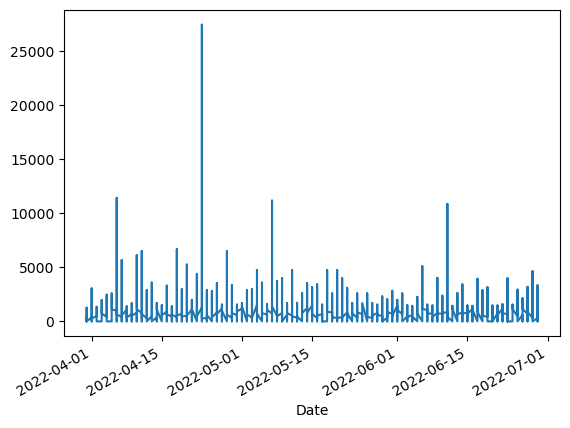

In [307]:
data12['Sales'].plot()

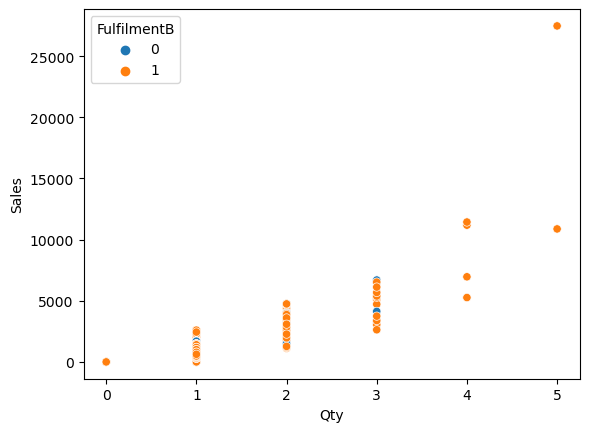

In [68]:
# Make a scatterplot with Qty as x, Sales as Y with regards to FulfilmentB 
_ = sns.scatterplot(x='Qty', y='Sales', data=data12, hue='FulfilmentB')

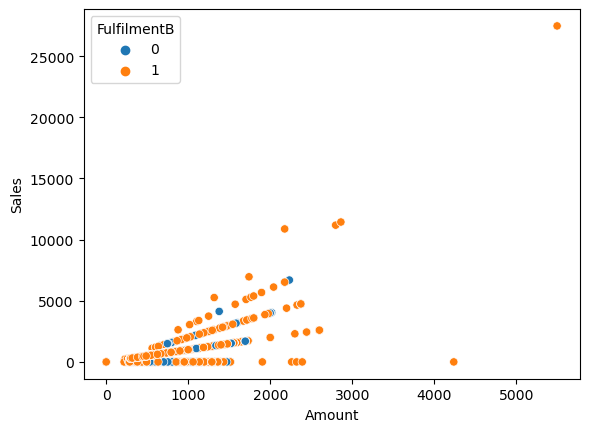

In [69]:
_ = sns.scatterplot(x='Amount', y='Sales', data=data12, hue='FulfilmentB')

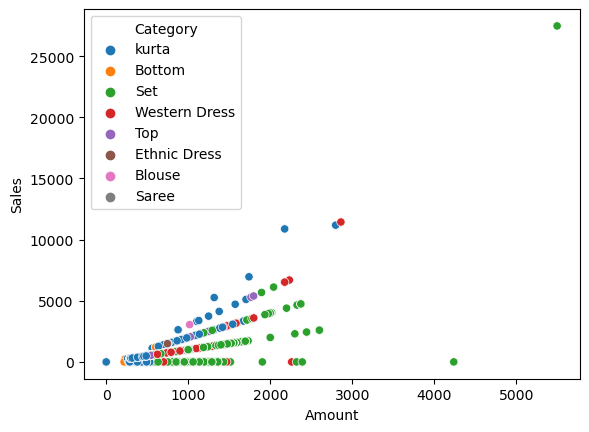

In [70]:
# Make a scatterplot with Qty as x, Sales as Y with regards to FulfilmentB 
_ = sns.scatterplot(x='Amount', y='Sales', data=data12, hue='Category')

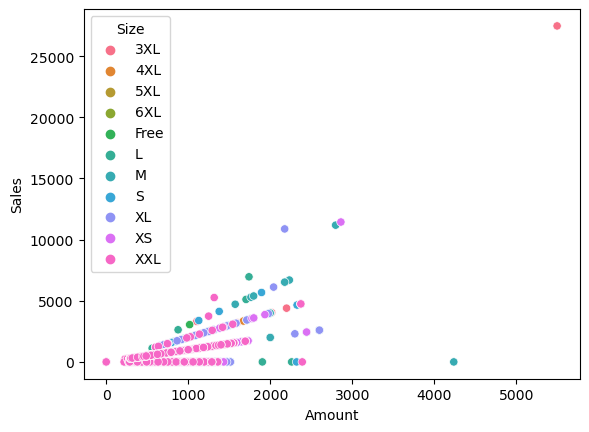

In [71]:
# Make a scatterplot with Qty as x, Sales as Y with regards to FulfilmentB 
_ = sns.scatterplot(x='Amount', y='Sales', data=data12, hue='Size')

In [308]:
data12.columns

Index(['index', 'Status', 'FulfilmentB', 'Category', 'Size', 'Qty', 'Amount',
       'ship-postal-code', 'Sales'],
      dtype='object')

In [309]:
data12.dtypes

index                 int64
Status               object
FulfilmentB           int64
Category             object
Size                 object
Qty                   int64
Amount              float64
ship-postal-code    float64
Sales                 int64
dtype: object

In [372]:
# Let's create dummies variables
features = ['Status', 'Category', 'Size']
dummies = pd.get_dummies(data12[features], dtype=int)
merged = pd.concat([data12, dummies], axis=1)
final3 = merged.drop(['Status', 'Category', 'Size'], axis=1)
data12 = final3
data12.head()

,index,FulfilmentB,Qty,Amount,ship-postal-code,Sales,Status_Cancelled,Status_Pending,Status_Pending - Waiting for Pick Up,Status_Shipped - Damaged,...,Size_4XL,Size_5XL,Size_6XL,Size_Free,Size_L,Size_M,Size_S,Size_XL,Size_XS,Size_XXL
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-30,1,1,1,406.0,560085.0,406,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-04-30,26,1,1,299.0,495001.0,299,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-04-30,85,1,1,377.0,700078.0,377,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-04-30,92,1,1,725.0,600028.0,725,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-04-30,129,1,1,579.0,560055.0,579,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data visualization for setting the values for p, d, q

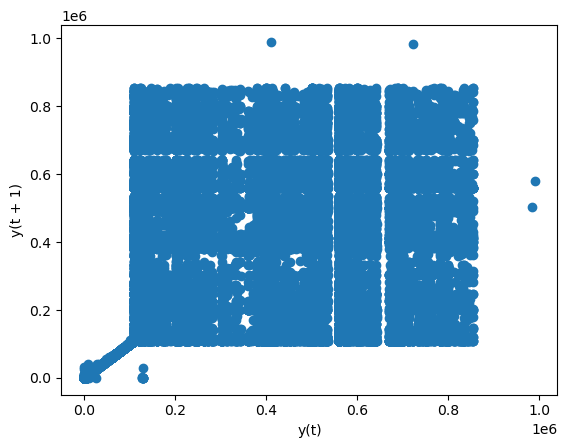

In [89]:
from pandas.plotting import lag_plot
lag_plot(data12)
pyplot.show()

Inserting a straing ligne show that the correlation can be either positive or negative, which require further analysis. let's next proceed to the autocorrelation test. 

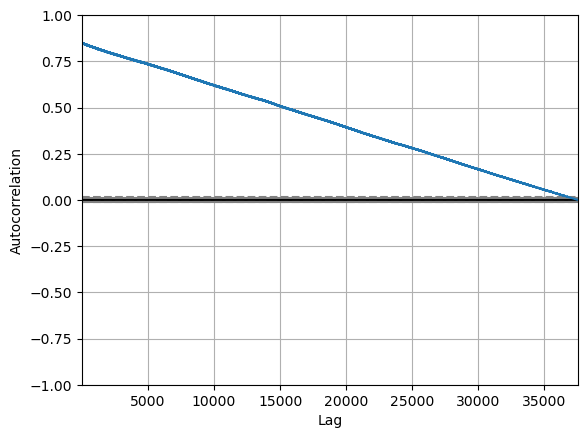

In [88]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data12)
pyplot.show()

The plot show that the overall data is negatively correlated. Since we are aiming to check the Sales trend for the given time. Let's check with plot_act with the variable "Sales". 

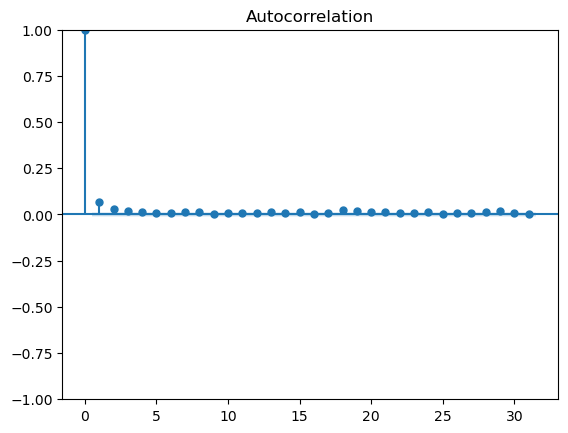

In [311]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data12.Sales, lags=31)
pyplot.show()

The plot also confirms that the "Sales" variable exhibits a negative correlation trend, indicating that the data is not suitable for direct autoregression without prior transformation. Therefore, we will examine how the differencing component of the ARIMA model can be used to make the data stationary.

## Data transformation for  the time series analysis

# Modeling